In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Superhero.csv')

In [3]:
df.head()

,ID,Name,Alignment,Gender,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Height,Weight,SkinColor,EyeColor,HairColor,Race
0,0,3-D Man,good,Male,50,31,43,32,25,52,233,203.0,441,-,yellow,No Hair,Human
1,1,A-Bomb,good,Male,38,100,17,80,17,64,316,191.0,65,blue,blue,No Hair,Icthyo Sapien
2,2,Abe Sapien,good,Male,88,14,35,42,35,85,299,185.0,90,red,blue,No Hair,Ungaran
3,3,Abin Sur,good,Male,50,90,53,64,84,65,406,203.0,441,-,green,No Hair,Human / Radiation
4,4,Abomination,bad,Male,63,80,53,90,55,95,436,-99.0,-99,-,blue,Black,Cosmic Entity


In [4]:
df['Gender'].replace('-','Agender',inplace=True)

In [6]:
gender_counts = df['Gender'].value_counts()
print(gender_countsder_counts)

Male       413
Female     157
Agender     24
Name: Gender, dtype: int64


In [7]:
alignment = df['Alignment'].value_counts()
print(alignment)

good       420
bad        163
neutral     11
Name: Alignment, dtype: int64


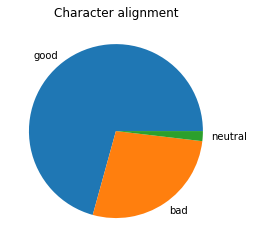

In [17]:
plt.pie(alignment,labels=alignment.index)
plt.title('Character alignment')
plt.show()

In [18]:
#IMPORTANT -  COMBAT CORRELATION ------------------------------------------------------------------------------
sc_df = df[['Strength','Combat']]

In [20]:
sc_covariance = sc_df.cov().iloc[0,1]
print(sc_covariance)

617.4890075573039


In [21]:
sc_strength =sc_df['Strength'].std()

In [22]:
sc_combat = sc_df['Combat'].std()

In [23]:
sc_pearson = sc_covariance/(sc_strength*sc_combat)
print(sc_pearson)

0.5720958235612106


In [24]:
ic_df = df[['Intelligence','Combat']]

In [25]:
ic_covariance = ic_df.cov().iloc[0,1]

In [26]:
ic_intelligence = ic_df['Intelligence'].std()

In [27]:
ic_combat = ic_df['Combat'].std()

In [28]:
ic_pearson = ic_covariance/(ic_combat*ic_intelligence)
print(ic_pearson)

0.7821504525171137


In [29]:
total_high = df.Total.quantile(q=0.99)

In [30]:
super_best = df[df['Total']>total_high]

In [31]:
super_best_names = list(super_best['Name'])
print(super_best_names)

['Amazo', 'General Zod', 'Martian Manhunter', 'Stardust', 'Superboy-Prime', 'Superman']


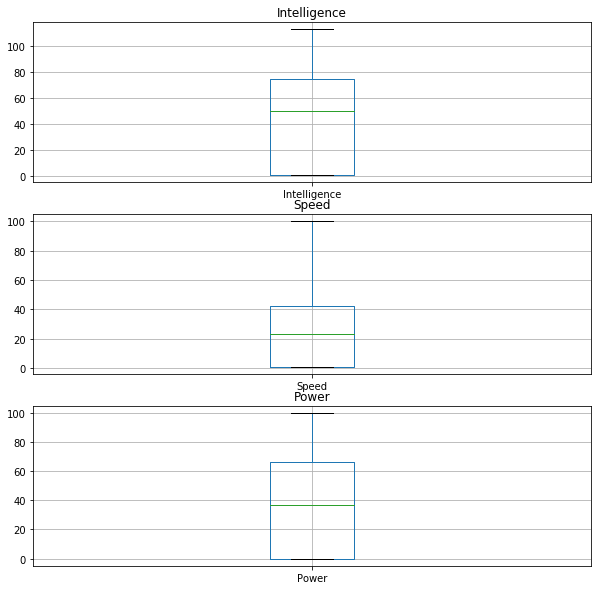

In [40]:
fig, (ax_1,ax_2,ax_3) = plt.subplots(3,1,figsize=(10,10))

boxplot1 = df.boxplot(column=['Intelligence'], ax=ax_1)
ax_1.set_title('Intelligence')

boxplot2 = df.boxplot(column=['Speed'], ax=ax_2)
ax_2.set_title('Speed')

boxplot3 = df.boxplot(column=['Power'], ax=ax_3)
ax_3.set_title('Power')

plt.show()